<a href="https://colab.research.google.com/github/JosenildoJunior/DIO/blob/main/Pipeline_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gerando Dados Aleatórios para Uso**

*Para a execução deste estudo de caso, será necessário criar uma base de dados fictícia. Com o objetivo de praticar diversas técnicas de ETL, desenvolveremos um DataFrame simulado para aplicar essas abordagens.*

In [11]:
import random
import csv

# Dados aleatórios de clientes
dados_clientes = []
num_clientes = 10

for i in range(1, num_clientes + 1):
    cliente = {
        "Id": random.randint(25, 74),
        "Nome": f"Cliente {i}",
        "Idade": random.randint(18, 70),
        "Saldo Bancário": round(random.uniform(1000, 100000), 2)
    }
    dados_clientes.append(cliente)

# Cabeçalho das colunas
cabecalho = ["Id", "Nome", "Idade", "Saldo Bancário"]

# Nome do arquivo CSV
nome_arquivo = "dados_clientes.csv"

# Salvar dados em um arquivo CSV
with open(nome_arquivo, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    escritor_csv = csv.DictWriter(arquivo_csv, fieldnames=cabecalho)

    # Escrever o cabeçalho
    escritor_csv.writeheader()

    # Escrever os dados
    for cliente in dados_clientes:
        escritor_csv.writerow(cliente)

print("Arquivo CSV criado com sucesso!")


Arquivo CSV criado com sucesso!


# **Extração (Extract)**

* **A etapa de extração no processo ETL envolve a coleta de dados de várias fontes, como bancos de dados, arquivos e APIs, permitindo a obtenção de informações essenciais para análise e tomada de decisões.**

In [12]:
# Manipulação de dados
import pandas as pd

# Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Lendo o Df criado
df = pd.read_csv("/content/dados_clientes.csv")

# Visualizando as 5 primeiras linhas
df.head()

,Id,Nome,Idade,Saldo Bancário
0,31,Cliente 1,30,73360.09
1,49,Cliente 2,34,73165.36
2,39,Cliente 3,64,82820.20
3,29,Cliente 4,34,32979.22
4,50,Cliente 5,18,53880.90


In [14]:
# Armazenando os Ids dos clientes
user_ids = df['Id'].tolist()

# Criando ids inexistentes
novos_ids = [65, 78]

# Incrementando os ids inexistentes
user_ids += novos_ids

# Observando os valores
print(user_ids)

[31, 49, 39, 29, 50, 52, 46, 61, 72, 39, 65, 78]


In [15]:
# Atribuindo na variavel users apenas os Ids que existem em ambos os df tanto no 'df' quanto no 'user_ids'
users = df[df['Id'].isin(user_ids)]

# Observando os valores
users

,Id,Nome,Idade,Saldo Bancário
0,31,Cliente 1,30,73360.09
1,49,Cliente 2,34,73165.36
2,39,Cliente 3,64,82820.20
3,29,Cliente 4,34,32979.22
4,50,Cliente 5,18,53880.90
5,52,Cliente 6,54,14100.87
6,46,Cliente 7,44,12041.26
7,61,Cliente 8,18,68980.75
8,72,Cliente 9,52,21495.84
9,39,Cliente 10,49,44071.25


# **Transformação (Transform)**

* **A transformação é crucial para limpar, padronizar e estruturar os dados de maneira que se tornem úteis para análises posteriores. Nessa etapa, os dados são processados, enriquecidos e convertidos para formatos consistentes.**

## *Ids repetidos*

Verificando se existe Ids repetidos no DF

In [16]:
# Criando função para observar se existe Ids duplicados no Df
def encontrar_ids_duplicados(df, coluna_id):
    duplicatas = users[users.duplicated(coluna_id)]
    num_dupli = 0

    if not duplicatas.empty:
        num_dupli += 1
        print(f"Foram encontrados {num_dupli} IDs repetidos:\n")
        print(duplicatas)
    else:
        print("Nenhum ID repetido encontrado.")

In [17]:
# Chamando a função
encontrar_ids_duplicados(users, 'Id')

Foram encontrados 1 IDs repetidos:

   Id        Nome  Idade  Saldo Bancário
9  39  Cliente 10     49        44071.25


In [18]:
# Observando os valores
users

,Id,Nome,Idade,Saldo Bancário
0,31,Cliente 1,30,73360.09
1,49,Cliente 2,34,73165.36
2,39,Cliente 3,64,82820.20
3,29,Cliente 4,34,32979.22
4,50,Cliente 5,18,53880.90
5,52,Cliente 6,54,14100.87
6,46,Cliente 7,44,12041.26
7,61,Cliente 8,18,68980.75
8,72,Cliente 9,52,21495.84
9,39,Cliente 10,49,44071.25


**Podemos verificar que existem duas entradas com o ID 39, no entanto, elas correspondem a clientes distintos.**

*Dado que não é possível manter IDs idênticos neste contexto, devemos abordar essa questão. A solução selecionada envolve a criação de uma função que, ao identificar valores duplicados em uma coluna específica, automaticamente os substitui por um valor determinado.*

In [19]:
# Criando função para alterar os valores repitidos
def alterar_id_repetido(df, coluna_id, novo_valor):

    # Obtendo os valores repitidos
    ids_repetidos = df[df.duplicated(coluna_id)][coluna_id].unique()

    # Observando se o novo valor já existe na coluna
    while novo_valor in df[coluna_id].values or novo_valor in ids_repetidos:
      # Caso exista vai ser incrementado mais um para ver se gera um valor único
        novo_valor += 1
    # Encontrando a linha de ocorrencia do primeiro Id repitido
    indice_linha = df[df[coluna_id] == ids_repetidos[0]].index[0]
    # Atribuindo um novo valor
    df.at[indice_linha, coluna_id] = novo_valor
    print("Valor alterado com sucesso!")

In [21]:
# Chamando a função
#novo_valor = 57 ou Colocar o numero direto na função
alterar_id_repetido(users, 'Id', 57)

Valor alterado com sucesso!


In [22]:
# Chamando a função
encontrar_ids_duplicados(users, 'Id')

Nenhum ID repetido encontrado.


In [23]:
# Observando os valores
users

,Id,Nome,Idade,Saldo Bancário
0,31,Cliente 1,30,73360.09
1,49,Cliente 2,34,73165.36
2,57,Cliente 3,64,82820.20
3,29,Cliente 4,34,32979.22
4,50,Cliente 5,18,53880.90
5,52,Cliente 6,54,14100.87
6,46,Cliente 7,44,12041.26
7,61,Cliente 8,18,68980.75
8,72,Cliente 9,52,21495.84
9,39,Cliente 10,49,44071.25


**Agora observamos que a questão dos IDs repetidos foi devidamente resolvida, e não há mais ocorrências desse tipo em nossa base de dados.**

## *Valores ausentes*

*Verificando quais as variáveis que tem dados faltantes.*

In [24]:
# Observando dados faltantes e ordenando em ordem decrescente
def soma_ausentes(dados):
    p_faltantes = dados.isnull().sum()
    valores_faltantes = pd.DataFrame({'Variavéis': dados.columns,
                                           'Soma de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['Soma de ausentes'], ascending = False)

soma_ausentes(users)

,Variavéis,Soma de ausentes
0,Id,0
1,Nome,0
2,Idade,0
3,Saldo Bancário,0


**É possível observar que não há dados ausentes nesta base de dados, o que nos permite avançar para a próxima etapa.**

## *Outliers*

*Verificando a existência de outliers nas variáveis númericas.*

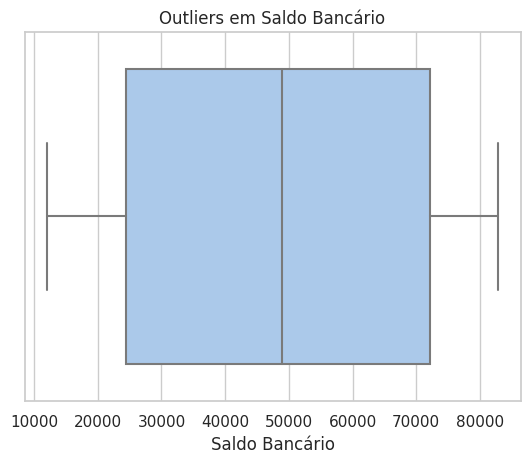

In [25]:
# Observando outliers em Saldo Bancário
sns.boxplot(x = users['Saldo Bancário']).set_title("Outliers em Saldo Bancário");

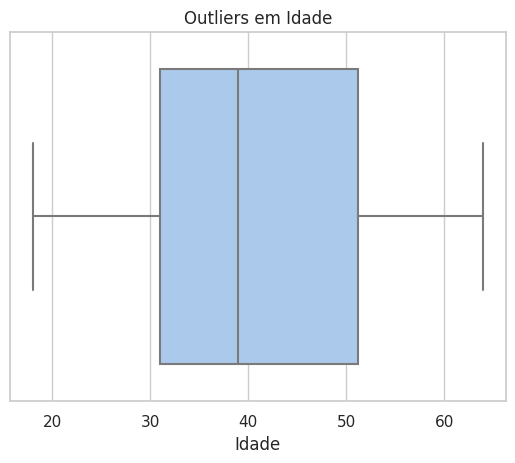

In [26]:
# Observando outliers em Idade
sns.boxplot(x = users['Idade']).set_title("Outliers em Idade");

**A análise dos gráficos revela claramente a ausência de outliers nessas variáveis, portanto, não é necessário realizar nenhum tipo de tratamento.**

# **Carga (Load)**